# Naive Bayes

## 1. Classifying Digits
In this part we will test digits classification on the MNIST dataset, using Bernoulli Naive Bayes (a generative model).

The MNIST dataset contains 28x28 grayscale images of handwritten digits between 0 and 9 (10 classes). For mathmatical analysis clarity, and for matching expected API, flatten each image to create a 1D array with 784 elements.

### Loading the MNIST dataset
Load the MNIST data set. The digits dataset is one of datasets scikit-learn comes with that do not require the downloading of any file from some external website. Use 
>```
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
```

Plot a single sample of each digit as the original image, so you get a feeling how the data looks like.

Finally, divide your data into train and test sets, using 1/7 of the data for testing.


In [446]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [447]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [448]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, random_state=317,stratify=y)

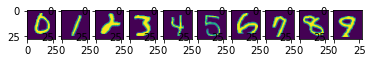

In [449]:
fig, axs = plt.subplots(1, 10)
for i in range(10): 
    k = np.where(y_train == str(i))[0][0]
    axs[i].imshow(np.array(X_train.iloc[k]).reshape(28,28))


### Bernoulli Naive Bayes
If we know how the digits are generated, then we know how to classify them (simply choose the digit class which will maximize the posterior probability) --- but which model should we use for describing the digits generation?

In this part we will try a very simplified model of digits creation (which is obviously not the same as the "real" model), using a Naive Bayes over an underlying Bernoulli distribution --- that is, we will assume that given a digit class, the pixels of the images are the result of independent coin flips, each with its own "head" probability.

Note that since we assume each pixl is either 0 (black) or 1 (white), we will need to adjust (preprocess) our data accrodingly (see below).

So, the model is stated as follows:
$$
\begin{align}
\text{Domain} && x \in \{0,1\}^{784} \\
\text{Prior} && \pi_j = \Pr(y=j) \\
\text{Likelihood} && P_j(x) = \Pr(x | y=j) \\
\end{align}
$$

Where for each $i\in 0\ldots 784$ it holds that
$$
P_{ji}(x_i) = \Pr(x_i | y=j) =
\begin{cases}
p_{ji} & \text{if } x_i=1 \\
1-p_{ji} & \text{if } x_i=0 \\
\end{cases}
$$


#### Question 1
Write the classification rule based on this Naive Bayes model. 
How would you esitmate each of the parameters of the model based on the trainning data? 


**Bonus:** Think of edge cases which may effect your estimator in an undesired way.

#### Answer 1

We could change the treshhold for binarisation from 0 to some better number in accuracy, but not significantly. We could run cv on a train to look for the best threshhold.

1. The shift of the data in train set eg on the left corner
2. Noise on the background
3. Reverse of the colors
4. Some pixel that is always 0.

In [450]:
model_param = 150
X_train_bool = np.where(X_train>model_param,1,0)
X_test_bool = np.where(X_test>model_param,1,0)

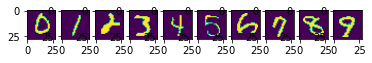

In [451]:
# X_train_bool = np.where(X_train>0,2,0)
fig, axs = plt.subplots(1, 10)
for i in range(10): 
    k = np.where(y_train == str(i))[0][0]
    axs[i].imshow(np.array(X_train_bool[k]).reshape(28,28))

The total accuracy: 0.8370


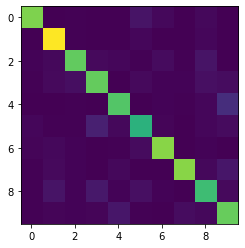

In [452]:
# Calculate probabilities:
#  fig, axs = plt.subplots(1, 10)
X_train_mean = []
for i in range(10): 
    likelihood = np.mean(X_train_bool[np.where(y_train==str(i))], axis=0)
    X_train_mean.append(likelihood)
    # axs[i].imshow(np.array(test).reshape(28,28))
X_train_mean = np.array(X_train_mean)

# Calculate prediction:
y_pred = []
for k in range(len(y_test)):
    prediction = np.argmax(np.where(X_test_bool[k]>0,X_train_mean,1-X_train_mean).prod(axis=1))
    y_pred.append(str(prediction))

# Calculate accuracy and confusion matrix
matrix = confusion_matrix(y_test.values, y_pred)
plt.imshow(matrix)
print(f'The total accuracy: {np.trace(matrix)/ matrix.sum():.4f}')

Prediction: 1
True value: 1


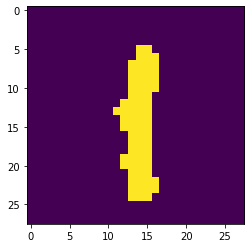

In [453]:
# One test prediction

k = np.random.randint(0,100)
prediction = np.argmax(np.where(X_test_bool[k]>0,X_train_mean,1-X_train_mean).prod(axis=1))
print(f'Prediction: {prediction}')
print(f'True value: {y_test.iloc[k]}')
plt.imshow(np.array(X_test_bool[k]).reshape(28,28))

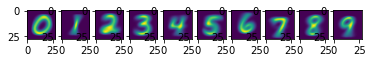

In [454]:
# The weights of the probabilities on Test data
fig, axs = plt.subplots(1, 10)
for i in range(10): 
    axs[i].imshow(np.array(X_train_mean[i]).reshape(28,28))

#### Question 2
Run a Naive Bayes classifier on the training data and apply predictions on the test data. Use the [sklearn.naive_bayes.BernoulliNB](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html) implementation (see the [source code for sklearn.naive_bayes](https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/naive_bayes.py) for details).

Remember we need to preprocess the data in this case such that each pixel would become either black (0) or white (1). For this, use the `binarize` parameter of the implementation. Set this value to $0$ (this is the default), which in this case would mean every pixel with non-zero value will be set to 1.

1. Plot the mean image of each class (estimated $\hat{p}_{ji}$) and generate one sample of each class (remember, you can do this since this is a generative model). You will need to access the `feature_log_prob_` attribute of the trained model.

2. Plot the confusion matrix of your classifier, as claculated on the test data (it is recommended to use [sklearn.metrics.confusion_matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)). Calculate the total accuracy (fraction of correctly classified images), and summarize the results in your own words.

3. Think of a way you can find the optimal threshold of the binarization part. **There is no need to actually perform this task --- just describe what you would have done.**


#### Answer 2

We could change the treshhold for binarisation from 0 to some better number in accuracy, but not significantly. We could run cv on a train to look for the best threshhold.


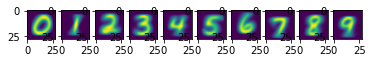

In [455]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB(binarize=0)
clf.fit(X_train, y_train)
fig, axs = plt.subplots(1, 10)
for i in range(10): 
    k = np.exp(clf.feature_log_prob_[i])
    axs[i].imshow(np.array(k).reshape(28,28))

The total accuracy: 0.8344


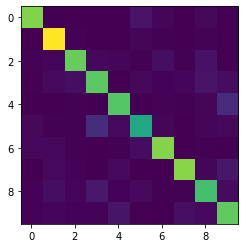

In [456]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test)
matrix = confusion_matrix(y_test, y_pred)
plt.imshow(matrix)
print(f'The total accuracy: {np.trace(matrix)/ matrix.sum():.4f}')

## 2. Classifing Text Documents using Multinomial Naive Bayes
In this exercise you will classify the "20 newsgroups" data set using your own naive bayes classifier and compare to the scikit learn built in version.

The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets: one for training (or development) and the other one for testing (or for performance evaluation). The split between the train and test set is based upon messages posted before and after a specific date.


* Load the **train** data using `from sklearn.datasets import fetch_20newsgroups`. remove headers, footers and quotes (see documentation)
* Use `sklearn.feature_extraction.text import CountVectorizer` to count words (stop_words='english')
* Write a class `NaiveBayes(BaseEstimator, ClassifierMixin)` and implement its `fit`, `predict` and `predict_proba` methods.
* use `sklearn.pipeline.make_pipeline` to chain the vectroizer and model.
* note: limit the vocuabolary size if you suffer memory issues
* compare the accuracy over the **test** data. You can use `accuracy_score, classification_report`
* compare to the built in `sklearn.naive_bayes.MultinomialNB`. If there are differences try to think why
* optimize performance in respect to vectorizer hyper parameters (e.g. max_features, max_df etc.).

### Optional: Model interpretability
Find the most important features for a **specific** decision of a NB classifier.
Because the model has learned the prior $p(x_i|c)$ during the training, the contribution of an individual feature value can be easily measured by the posterior, $p(c|x_i)=p(c)p(x_i|c)/p(x_i)$
Implement a function which gets a scikit-learn NB model as input and returns $P(c|x_i)$:

`def calc_p_c_given_xi(model)`

Hint: Use the following model properties:

* `model.class_log_prior_`
* `model.feature_log_prob_`

Note: remember these are logs and you need to use np.exp and normalize to get $P(c|x_i)$ 
Another hint: use numpy built-in broadcasting property.

* Use the interpretation to examine errors of the classifier where $\hat{c}\ne c$. Which top words support the correct class and which support the wrong class? You can use the `print_txt` below to color words. 

Bonus: How can you correct the analyzed error? 

To read more about model interpretation, see the blogpost below and my tutorial:
* https://lilianweng.github.io/lil-log/2017/08/01/how-to-explain-the-prediction-of-a-machine-learning-model.html
* https://github.com/chanansh/right_but_why

In [457]:
import string
def print_txt(txt, hot, cold):
  """
  print the text, coloring hot and cold words with colors
  """
  cold_color='\x1b[41;37m{}\x1b[0m'
  hot_color='\x1b[42;37m{}\x1b[0m'
  def color(token):
    lower = str(token).lower()
    lower = lower.replace('\t','').replace('\n','')
    lower = lower.translate(string.punctuation)
    if (lower in hot) and (lower in cold):
      return mid_color.format(token)
    elif lower in hot:
      return hot_color.format(token)
    elif lower in cold:
      return cold_color.format(token)
    else:
      return token
  colored_txt = " ".join([color(token) for token in txt.split(' ')])
  print(colored_txt)
print_txt('This word support the first class but this the other', ['word'],['other'])

This word support the first class but this the other


In [458]:
from sklearn.datasets import fetch_20newsgroups
corpus_X_train,corpus_y_train = fetch_20newsgroups(remove=('headers', 'footers', 'quotes'), subset='train', return_X_y=True)
corpus_X_test,corpus_y_test = fetch_20newsgroups(remove=('headers', 'footers', 'quotes'), subset='test', return_X_y=True)

In [459]:
from sklearn.base import BaseEstimator, ClassifierMixin
from scipy.sparse import csr_matrix

class NaiveBayes(BaseEstimator, ClassifierMixin):
  def fit(self, x, y):
    self._lidstone = 1
    
    self.x = x
    self.y = y
    self.classes = np.array(list(set(y)))
    n_classes = self.x.shape[0]
    self.likelihood = csr_matrix(np.empty((len(self.classes), self.x.shape[1])))

    self.prior = np.array([self.y[self.y == c].shape[0] / n_classes for c in self.classes])

    for idx, c in enumerate(self.classes):
      self.likelihood[idx] = self.prior[idx] * (np.sum(self.x[np.where(self.y==c)], axis=0) + self._lidstone )/ (np.sum(self.x, axis=0))
    
    # print(f'num words: {self.likelihood.shape}')

  def predict_proba(self, x):
    likelihood_words = x / self.x.sum()
    return likelihood_words * self.likelihood.T


  def predict(self, x):
    likelihood_words = x / self.x.sum()
    indexes = (likelihood_words * self.likelihood.T).argmax(axis = 1)
    return self.classes[indexes]


In [460]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

my_model = make_pipeline(CountVectorizer(), NaiveBayes())
x = my_model.fit(corpus_X_train, corpus_y_train)

print(f'NaiveBayes Score on TRAIN set: {my_model.score(corpus_X_train, corpus_y_train):.4}')
print(f'NaiveBayes Score on TEST set: {my_model.score(corpus_X_test, corpus_y_test):.4}')

/Users/tansla/anaconda3/lib/python3.7/site-packages/scipy/sparse/_index.py:124: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


NaiveBayes Score on TRAIN set: 0.7811
NaiveBayes Score on TEST set: 0.5327


In [461]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
corpus_y_pred = my_model.predict(corpus_X_test)
print(classification_report(corpus_y_test, corpus_y_pred))
print(accuracy_score(corpus_y_test, corpus_y_pred))


              precision    recall  f1-score   support

           0       0.12      0.09      0.11       319
           1       0.77      0.54      0.64       389
           2       0.68      0.18      0.29       394
           3       0.61      0.57      0.59       392
           4       0.92      0.39      0.55       385
           5       0.52      0.84      0.64       395
           6       0.89      0.52      0.66       390
           7       0.90      0.51      0.65       396
           8       0.93      0.41      0.57       398
           9       0.98      0.62      0.76       397
          10       0.85      0.88      0.87       399
          11       0.36      0.81      0.50       396
          12       0.74      0.27      0.39       393
          13       0.83      0.71      0.77       396
          14       0.77      0.71      0.74       394
          15       0.38      0.93      0.54       398
          16       0.69      0.27      0.39       364
          17       0.22    

### Comments

We could see that the classes are not equally good for the prediction and a model tends to overfit.

In [462]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

model = make_pipeline(CountVectorizer(min_df=1), MultinomialNB())
model.fit(corpus_X_train, corpus_y_train)

print(f'MultinomialNB Score on TRAIN set: {model.score(corpus_X_train, corpus_y_train):.4}')
print(f'MultinomialNB Score on TEST set: {model.score(corpus_X_test, corpus_y_test):.4}')


print(f'NaiveBayes Score on TRAIN set: {my_model.score(corpus_X_train, corpus_y_train):.4}')
print(f'NaiveBayes Score on TEST set: {my_model.score(corpus_X_test, corpus_y_test):.4}')

MultinomialNB Score on TRAIN set: 0.7454
MultinomialNB Score on TEST set: 0.5431
NaiveBayes Score on TRAIN set: 0.7811
NaiveBayes Score on TEST set: 0.5327


### Comments:

The difference between Sklearn and our implementation is more probably because of the calculations on the sparce matrix.

In [463]:
model.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'countvectorizer', 'multinomialnb', 'countvectorizer__analyzer', 'countvectorizer__binary', 'countvectorizer__decode_error', 'countvectorizer__dtype', 'countvectorizer__encoding', 'countvectorizer__input', 'countvectorizer__lowercase', 'countvectorizer__max_df', 'countvectorizer__max_features', 'countvectorizer__min_df', 'countvectorizer__ngram_range', 'countvectorizer__preprocessor', 'countvectorizer__stop_words', 'countvectorizer__strip_accents', 'countvectorizer__token_pattern', 'countvectorizer__tokenizer', 'countvectorizer__vocabulary', 'multinomialnb__alpha', 'multinomialnb__class_prior', 'multinomialnb__fit_prior'])

In [465]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer

parameters = {'multinomialnb__alpha':(0.1, 1), 'countvectorizer__max_df':(1, 0.75, 0.5), 
    'countvectorizer__max_features':(None, 50)}
model = make_pipeline(CountVectorizer(min_df=100), MultinomialNB())

grid_GBC = GridSearchCV(model, parameters)
grid_GBC.fit(corpus_X_train, corpus_y_train)

best_params = grid_GBC.best_params_

print(" Results from Grid Search " )
print(f'The best estimator across ALL searched params on TRAIN set: {grid_GBC.best_estimator_}')
print(f'The best score across ALL searched params on TRAIN set: {grid_GBC.best_score_:.4f}')
print(f'The best parameters across ALL searched params on TRAIN set: {best_params}')

/Users/tansla/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/tansla/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/tansla/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/Users/tansla/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py", line 355, in _fit
    **fit_params_steps[name],
  File "/Users/tan

 Results from Grid Search 
The best estimator across ALL searched params on TRAIN set: Pipeline(steps=[('countvectorizer', CountVectorizer(max_df=0.75, min_df=100)),
                ('multinomialnb', MultinomialNB(alpha=0.1))])
The best score across ALL searched params on TRAIN set: 0.5123
The best parameters across ALL searched params on TRAIN set: {'countvectorizer__max_df': 0.75, 'countvectorizer__max_features': None, 'multinomialnb__alpha': 0.1}


In [466]:
model = make_pipeline(CountVectorizer(min_df=100,max_df=best_params['countvectorizer__max_df']),
     MultinomialNB(alpha=best_params['multinomialnb__alpha']))

model.fit(corpus_X_train, corpus_y_train)
print(f'Score on TRAIN set with BEST params; {model.score(corpus_X_train, corpus_y_train):.4}')
print(f'Score on TEST set with BEST params; {model.score(corpus_X_test, corpus_y_test):.4}')

Score on TRAIN set with BEST params; 0.6264
Score on TEST set with BEST params; 0.4777


### Comments:


Using Gridsearch for finding better parametrs in terms of score not helped, in terms of productivity (speed of the model) the min_df could help, but both models (Skleran and our implementaion) works fast enough and using min_df is decrease the accuracy of the prediction.